In [1]:
import numpy as np
import pandas as pd 
#data = pd.read_csv('Fremont1.csv', index_col = 'Date', parse_dates= True)
#data.head()

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt 
#plt.figure(figsize=(10,12))
plt.style.use('seaborn')

In [3]:
from jupyterworkflow.data import get_fremont_data

In [4]:
data = get_fremont_data()
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


In [5]:
#from urllib.request import urlretrieve
#urlretrieve(URL,'Fremont.csv')

In [6]:
#import pandas as pd 
#data = pd.read_csv('Fremont.csv')
#data.head()

In [7]:
data.describe()

,West,East,Total
count,51063.000000,51063.000000,51063.000000
mean,57.126902,53.654329,110.781231
std,82.685731,70.067851,139.511157
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,29.000000,60.000000
75%,70.000000,71.000000,145.000000
max,717.000000,698.000000,957.000000


In [8]:

#data.columns = ['West', 'East']

In [9]:
data.count()

West     51063
East     51063
Total    51063
dtype: int64

In [10]:
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


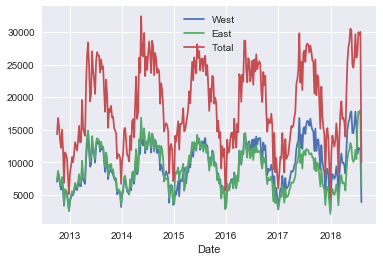

In [11]:
data.resample('W').sum().plot()

<Figure size 720x864 with 0 Axes>

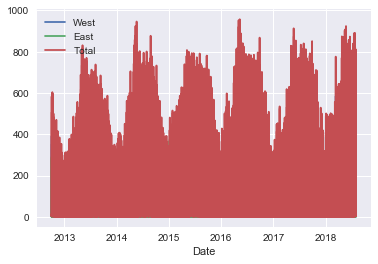

In [12]:

#data.resample('W').sum().plot()
plt.figure(figsize=(10,12))
data.plot()


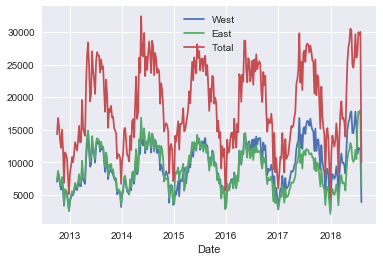

In [13]:
data.resample('W').sum().plot()

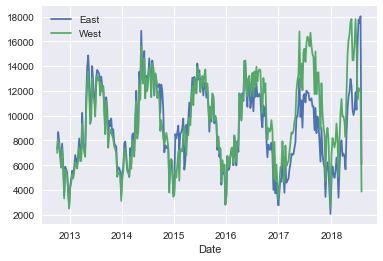

In [14]:
plt.subplots()
data['East'].resample('W').sum().plot(legend=True)
data['West'].resample('W').sum().plot(legend = True)

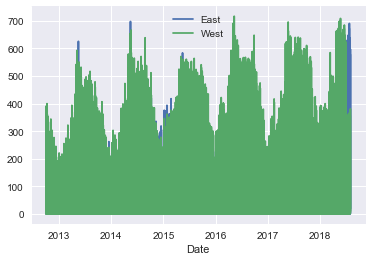

In [15]:
plt.subplots()
data['East'].resample('H').sum().plot(legend=True)
data['West'].resample('H').sum().plot(legend = True)

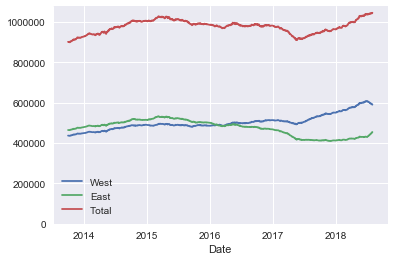

In [16]:
data['Total'] = data['West'] + data['East']
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0,None);

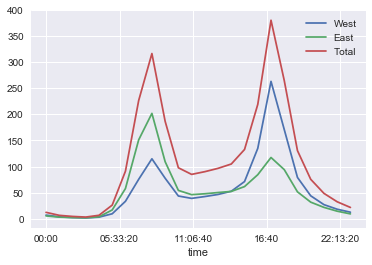

In [17]:
data.groupby(data.index.time).mean().plot()

In [18]:
pivoted = data.pivot_table('Total',index=data.index.time, columns=data.index.date)
pivoted.iloc[:10,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0
05:00:00,31.0,26.0,25.0,5.0,9.0
06:00:00,155.0,142.0,105.0,27.0,17.0
07:00:00,352.0,319.0,319.0,33.0,26.0
08:00:00,437.0,418.0,370.0,105.0,69.0
09:00:00,276.0,241.0,212.0,114.0,103.0


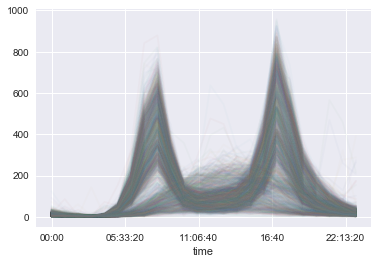

In [19]:
pivoted.plot(legend = False, alpha = 0.03)

In [20]:
pivoted.index[:24]

Index([00:00:00, 01:00:00, 02:00:00, 03:00:00, 04:00:00, 05:00:00, 06:00:00,
       07:00:00, 08:00:00, 09:00:00, 10:00:00, 11:00:00, 12:00:00, 13:00:00,
       14:00:00, 15:00:00, 16:00:00, 17:00:00, 18:00:00, 19:00:00, 20:00:00,
       21:00:00, 22:00:00, 23:00:00],
      dtype='object')

In [21]:
data.index

DatetimeIndex(['2012-10-03 00:00:00', '2012-10-03 01:00:00',
               '2012-10-03 02:00:00', '2012-10-03 03:00:00',
               '2012-10-03 04:00:00', '2012-10-03 05:00:00',
               '2012-10-03 06:00:00', '2012-10-03 07:00:00',
               '2012-10-03 08:00:00', '2012-10-03 09:00:00',
               ...
               '2018-07-31 14:00:00', '2018-07-31 15:00:00',
               '2018-07-31 16:00:00', '2018-07-31 17:00:00',
               '2018-07-31 18:00:00', '2018-07-31 19:00:00',
               '2018-07-31 20:00:00', '2018-07-31 21:00:00',
               '2018-07-31 22:00:00', '2018-07-31 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=51072, freq=None)

## Scikit Learn to do further analysis of the data.

In [22]:
x  =pivoted.fillna(0).T.values
x.shape

(2128, 24)

In [23]:
#treating each day as a projection
from sklearn.decomposition import PCA 
x2 = PCA(2, svd_solver='full').fit_transform(x)

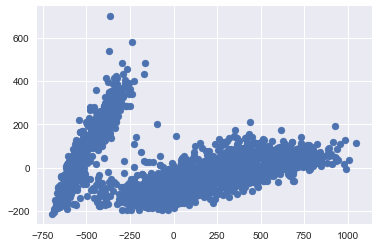

In [24]:
plt.scatter(x2[:,0],x2[:,1])

### using the gaussion mixture model to identify where the days fall

In [25]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2)
gmm.fit(x)
labels = gmm.predict(x)
labels

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

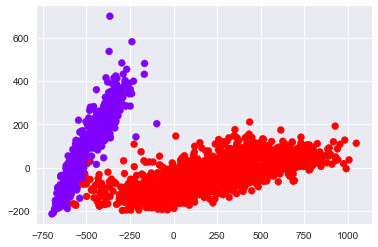

In [26]:
plt.scatter(x2[:,0],x2[:,1], c=labels, cmap='rainbow')

# days of commuting

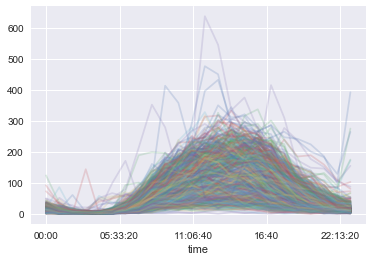

In [27]:
pivoted.T[labels == 0].T.plot(legend = False, alpha = 0.20)

# Non commuting days

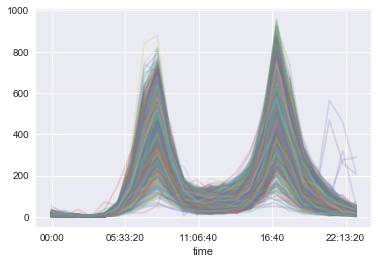

In [34]:
pivoted.T[labels == 1].T.plot(legend = False, alpha = 0.20)

In [29]:
daysofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

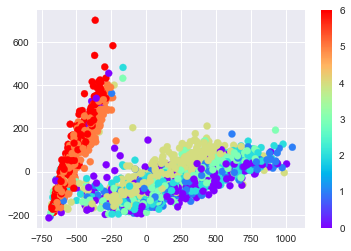

In [35]:
plt.scatter(x2[:,0],x2[:,1], c=daysofweek, cmap='rainbow')
plt.colorbar()

In [ ]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1)& (daysofweek < 5 )]